In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
import joblib

In [149]:
df = pd.read_csv("./data/weatherAUS.csv")

In [150]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [151]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

/var/folders/yg/0w_l2flj2rg2km6898j0j0_40000gn/T/ipykernel_84801/3247053694.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["RainTomorrow"] = df["RainTomorrow"].replace({"No": 0, "Yes": 1})


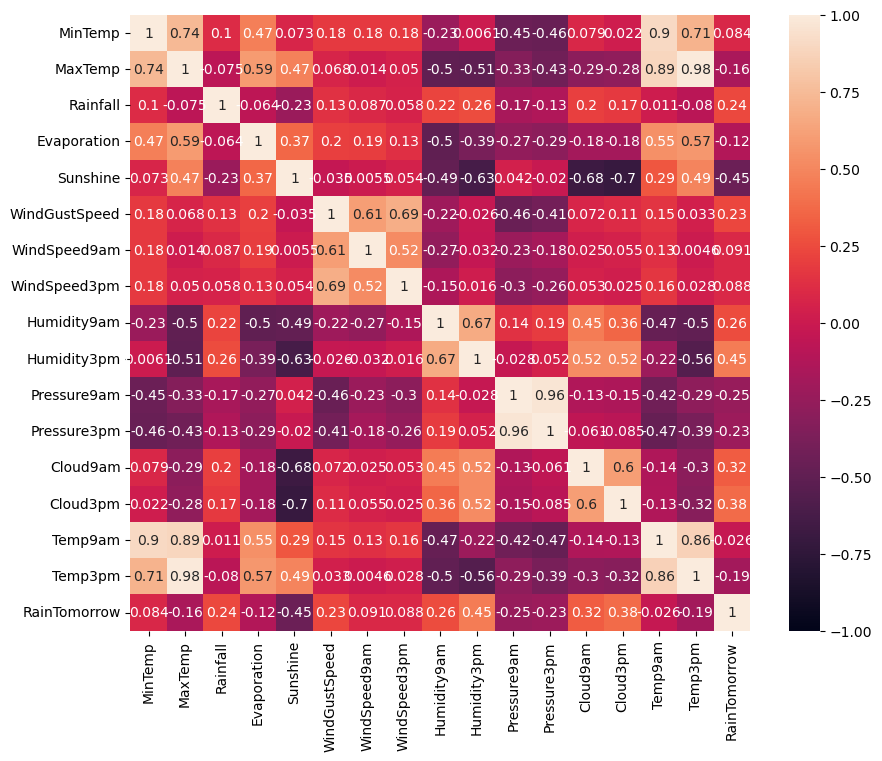

In [153]:
df["RainTomorrow"] = df["RainTomorrow"].replace({"No": 0, "Yes": 1})
corrs = df.corr(numeric_only=True)
plt.subplots(figsize=(10, 8))
sns.heatmap(corrs, annot=True, vmin=-1, vmax=1)
plt.show()

In [154]:
df_selected = df[["Rainfall", "Sunshine", "Humidity9am", "Humidity3pm", "Cloud9am", "Cloud3pm", "RainTomorrow"]]

df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Rainfall      142199 non-null  float64
 1   Sunshine      75625 non-null   float64
 2   Humidity9am   142806 non-null  float64
 3   Humidity3pm   140953 non-null  float64
 4   Cloud9am      89572 non-null   float64
 5   Cloud3pm      86102 non-null   float64
 6   RainTomorrow  142193 non-null  float64
dtypes: float64(7)
memory usage: 7.8 MB


In [155]:
df_selected.corr()

,Rainfall,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainTomorrow
Rainfall,1.000000,-0.227549,0.224405,0.255755,0.198528,0.172403,0.239032
Sunshine,-0.227549,1.000000,-0.490819,-0.629130,-0.675323,-0.703930,-0.450768
Humidity9am,0.224405,-0.490819,1.000000,0.666949,0.452297,0.357326,0.257161
Humidity3pm,0.255755,-0.629130,0.666949,1.000000,0.517120,0.523120,0.446160
Cloud9am,0.198528,-0.675323,0.452297,0.517120,1.000000,0.603564,0.317380
Cloud3pm,0.172403,-0.703930,0.357326,0.523120,0.603564,1.000000,0.381870
RainTomorrow,0.239032,-0.450768,0.257161,0.446160,0.317380,0.381870,1.000000


In [156]:
df_selected_nonan = df_selected.dropna()
df_selected_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64082 entries, 6049 to 142302
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rainfall      64082 non-null  float64
 1   Sunshine      64082 non-null  float64
 2   Humidity9am   64082 non-null  float64
 3   Humidity3pm   64082 non-null  float64
 4   Cloud9am      64082 non-null  float64
 5   Cloud3pm      64082 non-null  float64
 6   RainTomorrow  64082 non-null  float64
dtypes: float64(7)
memory usage: 3.9 MB


In [157]:
df_selected_nonan.head()

,Rainfall,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainTomorrow
6049,0.0,12.3,20.0,13.0,2.0,5.0,0.0
6050,0.0,13.0,30.0,8.0,1.0,1.0,0.0
6052,0.0,10.6,42.0,22.0,1.0,6.0,0.0
6053,0.0,12.2,37.0,22.0,1.0,5.0,0.0
6054,0.0,8.4,19.0,15.0,1.0,6.0,0.0


In [158]:
X = df_selected_nonan.drop(columns="RainTomorrow")
y = df_selected_nonan["RainTomorrow"]

In [159]:
y.value_counts()

RainTomorrow
0.0    49628
1.0    14454
Name: count, dtype: int64

In [160]:
X_under, y_under = RandomUnderSampler().fit_resample(X, y)
y_under.value_counts()

RainTomorrow
0.0    14454
1.0    14454
Name: count, dtype: int64

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.5)

In [162]:
rain_model = DecisionTreeClassifier()
rain_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [163]:
train_preds = rain_model.predict(X_train)
test_preds = rain_model.predict(X_test)
print(f"Training scores: {accuracy_score(y_train, train_preds)} {f1_score(y_train, train_preds)}")
print(f"Testing scores: {accuracy_score(y_test, test_preds)} {f1_score(y_test, test_preds)}")

Training scores: 0.9997232599972325 0.9997236805747445
Testing scores: 0.6910889719108897 0.686512672891947


In [164]:
rain_model = DecisionTreeClassifier(max_depth=1, max_features=2)
rain_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, max_features=2)

In [165]:
train_preds = rain_model.predict(X_train)
test_preds = rain_model.predict(X_test)
print(f"Training scores: {accuracy_score(y_train, train_preds)} {f1_score(y_train, train_preds)}")
print(f"Testing scores: {accuracy_score(y_test, test_preds)} {f1_score(y_test, test_preds)}")

Training scores: 0.6834094368340944 0.6657414170927685
Testing scores: 0.6690881416908814 0.6526759131508241


In [166]:
rain_model = RandomForestClassifier(n_estimators=300, max_depth=7)
rain_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=300)

In [167]:
train_preds = rain_model.predict(X_train)
test_preds = rain_model.predict(X_test)
print(f"Training scores: {accuracy_score(y_train, train_preds)} {f1_score(y_train, train_preds)}")
print(f"Testing scores: {accuracy_score(y_test, test_preds)} {f1_score(y_test, test_preds)}")

Training scores: 0.7890549328905493 0.7943616375531124
Testing scores: 0.76477099764771 0.7688647178789938


In [168]:
joblib.dump(rain_model, "./models/rain_model.pkl")

['./models/rain_model.pkl']